# Conditional Generation

In this tutorial, we show how to generate samples that are conditioned on specific values for a set of attributes. By that, we effectively create partially synthetic data, where synthetic attributes are randomly sampled given the context of a handful of pre-determined fixed attributes. Note, that the synthetic data is still statistically representative, but within the given context. The privacy of the overall dataset is then largely dependend on the privacy of the provided fixed attributes.

We will demonstrate conditional generation for two use cases:
1. First, we generate synthetic data for the UCI Adult Income, but will probe the model for an equal gender split and an uncorrelated income attribute. I.e., we will remove the gender income gap, and see how the other attributes will change accordingly.
1. Secondly, we create partially synthetic data for AirBnB listings in Manhattan, where the locations will then be actual locations, yet all other attributes are synthetic.

To perform either scenario, we will create a Seed table that contains all columns, that we want to hold fixed. Once, a Generator has been created, we can then proceed to provide the seed context with the fixed attributes to conditionally create a Synthetic Dataset.

Note, the same kind of conditional generation can also be performed for two-table setups. Once a two-table Generator is trained, one can simply provide a Seed context for the subject table. The non-fixed columns of the subject table and the entire linked table will then be conditionally generated.

## Use Case 1 - Rebalanced UCI Adult Income

For this use case, we will be using again the UCI Adult Income [[1](#refs)] dataset. We will want to condition the synthetic data generation on the `sex` and `income` columns.

### Create a Generator with MOSTLY AI

The code below will create a Generator using the MOSTLY AI Synthetic Data Platform.

Please replace `INSERT_YOUR_API_KEY` with your API KEY before executing the code below and make sure you have all the required packages installed (e.g. `scikit-learn`, `seaborn`, etc.)



In [1]:
from mostlyai import MostlyAI
import pandas as pd
from sklearn.model_selection import train_test_split

# fetch original data
df = pd.read_csv('https://github.com/mostly-ai/public-demo-data/raw/dev/census/census.csv.gz')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [2]:
# initialize client
mostly = MostlyAI(api_key='INSERT_YOUR_API_KEY')

# train a generator on the original training data
g = mostly.train(data=df, name='Conditional Generation Tutorial Census')

Created generator ]8;id=602031;https://app.mostly.ai/d/generators/20fe1203-127f-4ea6-8b00-1c6647f55a00\20fe1203-127f-4ea6-8b00-1c6647f55a00]8;;\

Started generator training

Output()

🎉 Your generator is ready! Use it to create synthetic data. Share it so others can do the same.

### Generate Synthetic Dataset with MOSTLY AI

Let's create a dataframe, with specific values for the fixed attributes `sex` and `income`, and use that as a seed for generating a Synthetic Dataset. We will create a 50/50 split between `Male` and `Females`. And we will keep the share of low- and high-income earners constant, however randomizing between men and women, effectively removing the gender income gap.

In [3]:
import numpy as np
np.random.seed(1)

n = 48_842
p_inc = (df.income=='>50K').mean()
seed = pd.DataFrame({
    'sex': np.random.choice(['Male', 'Female'], n, p=[.5, .5]),
    'income': np.random.choice(['<=50K', '>50K'], n, p=[1-p_inc, p_inc]),
})
display(seed)

,sex,income
0,Male,<=50K
1,Female,<=50K
2,Male,<=50K
3,Male,<=50K
4,Male,<=50K
...,...,...
48837,Female,>50K
48838,Male,<=50K
48839,Female,>50K
48840,Female,>50K


In [4]:
# generate a synthetic dataset with a seed
sd = mostly.generate(generator=g, seed=seed)
 
# start using it
syn = sd.data()
print(f"Created synthetic data with {syn.shape[0]:,} records and {syn.shape[1]:,} attributes")

Created synthetic dataset ]8;id=924926;https://app.mostly.ai/d/synthetic-datasets/1bf7a303-c0ff-4f53-9f33-8e2308923600\1bf7a303-c0ff-4f53-9f33-8e2308923600]8;;\ with generator ]8;id=765854;https://app.mostly.ai/d/generators/20fe1203-127f-4ea6-8b00-1c6647f55a00\20fe1203-127f-4ea6-8b00-1c6647f55a00]8;;\

Started synthetic dataset generation

Output()

🎉 Your synthetic dataset is ready! Use it to consume the generated data. Share it so others can do the same.

Created synthetic data with 48,842 records and 15 attributes


### Explore Synthetic Data

Show 10 randomly sampled synthetic records. Note, that you can execute the following cell multiple times, to see different samples.

You can see that the partially synthetic data consists of about half male and half female.

In [5]:
syn.sample(n=10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
30909,22,State-gov,123433,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,10,?,<=50K
24516,62,Private,215773,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,32,United-States,<=50K
20701,20,?,475517,Some-college,10,Never-married,?,Own-child,Black,Female,0,0,32,?,<=50K
35166,31,Private,191815,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K
5896,39,Federal-gov,107578,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,3228,0,16,United-States,<=50K
40421,41,Self-emp-not-inc,36558,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1740,56,United-States,<=50K
12277,33,Private,226546,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
16329,33,Private,201958,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,<=50K
19047,19,State-gov,248921,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<=50K
21539,60,Private,113325,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,30,United-States,>50K


Let's now compare the age distribution of records from the the original data vs. from the partially synthetic data. As we will see, the synthesized women are now significantly older, in order to meet the criteria of removing the gender income gap.

In a similar vein, you can now study other shifts in the distributions, that are the consequence of the provided seed data.

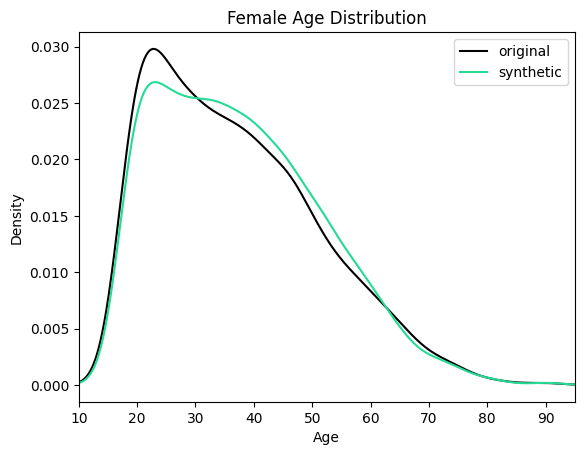

In [6]:
import matplotlib.pyplot as plt
plt.xlim(10, 95)
plt.title('Female Age Distribution')
plt.xlabel('Age')
df[df.sex=='Female'].age.plot.kde(color='black', bw_method=0.2)
syn[syn.sex=='Female'].age.plot.kde(color='#24db96', bw_method=0.2)
plt.legend({'original': 'black', 'synthetic': '#24db96'})
plt.show()

## Use Case 2 - Partially Synthetic Geo Data

For this use case, we will be using 2019 AirBnB listings [[2](#refs)] for Manhattan. The dataset consists of 48,895 records, and 10 mixed-type columns, with two of those representing the latitude and longitude of the listing. We will use this dataset to create synthetic attributes for all the actual locations, that were contained in the original.

### Pre-Processing

We will need to concatenate `latitude` and `longitude` together into a single column, as this is the format expected by MOSTLY AI, in order to improve its representation of geo information.

In this example we will not artifically create Seed data, but will use the concatenated `LAT_LONG` variable and the `neighbourhood` variable from the original data as a Seed dataframe.

In [7]:
# fetch original data
df_orig = pd.read_csv('https://github.com/mostly-ai/public-demo-data/raw/dev/airbnb/airbnb.csv.gz')
df_orig

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,latitude,longitude
0,Manhattan,Upper West Side,Private room,58,30,0,NaN,NaN,317,40.79901,-73.96135
1,Queens,Maspeth,Private room,39,30,0,NaN,NaN,352,40.74064,-73.89956
2,Manhattan,Upper West Side,Entire home/apt,150,30,48,2019-06-11,0.55,35,40.78000,-73.98249
3,Brooklyn,Downtown Brooklyn,Private room,65,30,0,NaN,NaN,17,40.69230,-73.98298
4,Manhattan,Washington Heights,Entire home/apt,100,30,13,2018-11-28,0.18,219,40.85604,-73.93469
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Crown Heights,Entire home/apt,99,4,55,2019-06-26,2.06,17,40.67018,-73.93224
48891,Brooklyn,Sunset Park,Entire home/apt,140,2,83,2019-06-30,2.40,7,40.66148,-73.98942
48892,Manhattan,Midtown,Entire home/apt,200,1,9,2016-04-08,0.20,0,40.74509,-73.98268
48893,Manhattan,Hell's Kitchen,Entire home/apt,180,1,1,2015-12-13,0.02,0,40.76263,-73.98909


In [8]:
df = df_orig.copy()

# concatenate latitude and longitude to "LAT, LONG" format
df['LAT_LONG'] = df['latitude'].astype(str) + ', ' + df['longitude'].astype(str)
df = df.drop(columns=['latitude', 'longitude'])

# define list of columns, on which we want to condition on
seed_cols = ['neighbourhood', 'LAT_LONG']

# create dataframe that will be used as seed
df_seed = df[seed_cols]
display(df_seed.head())

,neighbourhood,LAT_LONG
0,Upper West Side,"40.79901, -73.96135"
1,Maspeth,"40.74064, -73.89956"
2,Upper West Side,"40.78, -73.98249"
3,Downtown Brooklyn,"40.6923, -73.98298"
4,Washington Heights,"40.85604, -73.93469"


### Create Generator with MOSTLY AI

The code below will create a Generator using the MOSTLY AI Synthetic Data Platform. We use pre-processed AirBnB data and need to configure column `LAT_LONG` as encoding type `Latitude, Longitude`. In order to not wait too long for the Generator to be ready we are limiting the max. training time to 2 minutes which will already provide us with sufficient quality.

In [23]:
# Train a generator on the pre-processed AirBnB data
config = {
    'name': 'Conditional Generation Tutorial AirBnB',
    'tables': [{
        'name': 'AirBnB',
        'data': df,
        'modelConfiguration': {'maxTrainingTime': 2},
        'columns': [
            {'name': 'neighbourhood_group', 'included': True, 'modelEncodingType': 'CATEGORICAL'},
            {'name': 'neighbourhood', 'included': True, 'modelEncodingType': 'CATEGORICAL'},
            {'name': 'room_type', 'included': True, 'modelEncodingType': 'CATEGORICAL'},
            {'name': 'price', 'included': True, 'modelEncodingType': 'NUMERIC_AUTO'},
            {'name': 'minimum_nights', 'included': True, 'modelEncodingType': 'NUMERIC_AUTO'},
            {'name': 'number_of_reviews', 'included': True, 'modelEncodingType': 'NUMERIC_AUTO'},
            {'name': 'last_review', 'included': True, 'modelEncodingType': 'DATETIME'},
            {'name': 'reviews_per_month', 'included': True, 'modelEncodingType': 'NUMERIC_AUTO'},
            {'name': 'availability_365', 'included': True, 'modelEncodingType': 'NUMERIC_AUTO'},
            {'name': 'LAT_LONG', 'included': True, 'modelEncodingType': 'LAT_LONG'}
        ]
    }]
}

g_airbnb = mostly.train(config=config)

Created generator ]8;id=933735;https://app.mostly.ai/d/generators/cb7d3c5e-91c1-4d62-8c19-ef0fded2b78a\cb7d3c5e-91c1-4d62-8c19-ef0fded2b78a]8;;\

Started generator training

Output()

🎉 Your generator is ready! Use it to create synthetic data. Share it so others can do the same.

### Generate Synthetic Dataset with MOSTLY AI

We can now generate a Synthetic Dataset with the Seed that we already previously created.

In [24]:
# generate a synthetic dataset with a seed
sd = mostly.generate(generator=g_airbnb, seed=df_seed)
 
# start using it
syn_partial = sd.data()
print(f"Created synthetic data with {syn_partial.shape[0]:,} records and {syn_partial.shape[1]:,} attributes")

Created synthetic dataset ]8;id=818447;https://app.mostly.ai/d/synthetic-datasets/70cda54c-7fee-4d59-ad01-f9ad14cab4f1\70cda54c-7fee-4d59-ad01-f9ad14cab4f1]8;;\ with generator ]8;id=574934;https://app.mostly.ai/d/generators/cb7d3c5e-91c1-4d62-8c19-ef0fded2b78a\cb7d3c5e-91c1-4d62-8c19-ef0fded2b78a]8;;\

Started synthetic dataset generation

Output()

🎉 Your synthetic dataset is ready! Use it to consume the generated data. Share it so others can do the same.

Created synthetic data with 48,895 records and 10 attributes


### Explore Synthetic Data

Let's compare the price distribution across Manhatten. Note again, that while the locations in the partially synthetic data are actual locations, all other attributes, incl. the price per night, are randomly sampled by the generative model. Still, these prices are again statistically representative given the context, i.e. the location within Manhattan.

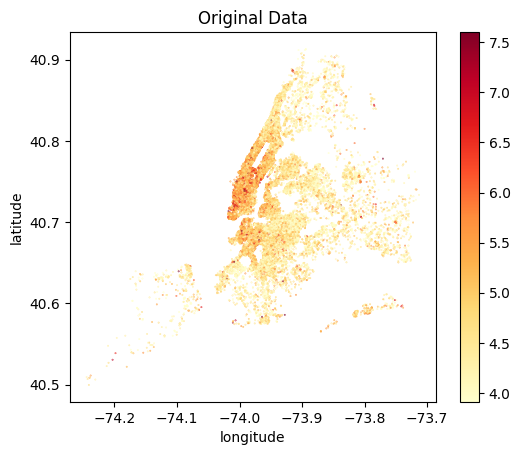

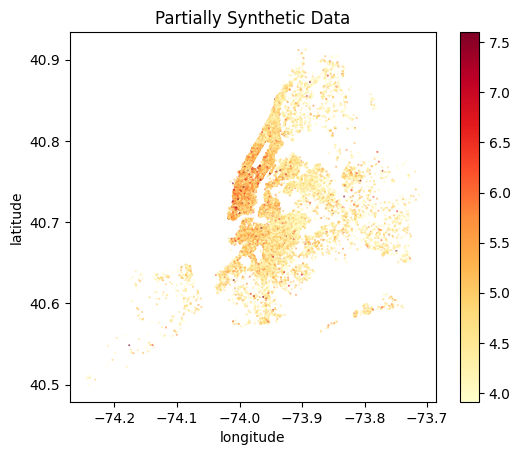

In [26]:
%%capture --no-display
def plot_manhatten(df, title):
    ax = df_orig.plot.scatter(
        x='longitude', 
        y='latitude', 
        s=0.1, 
        alpha=1, 
        color=np.log(df.price.clip(lower=50, upper=2_000)),
        cmap=plt.colormaps['YlOrRd'],
    )
    ax.set_aspect(1.3)
    ax.set_title(title)
    plt.show()
    
plot_manhatten(df_orig, 'Original Data')
plot_manhatten(syn_partial, 'Partially Synthetic Data')

Note, that you can also create a fully synthetic data, and will also yield statistically representative locations with their attributes. However, as these locations do not necessarily exist (e.g. they might end up in the Hudson River), the demonstrated approach allows you to combine the best of both worlds. 

## Conclusion

In this tutorial we walked throught the process of conditional generation to yield partially synthetic data. This allows you to probe the generative model with a specific context, whether that is hypothetical (use case 1) or real (use case 2), and gain corresponding insights for specific scenarios.

## Further exercises

In addition to walking through the above instructions, we suggest..
* to use a different set of fixed columns for the US Census dataset
* to generate a very large number of records for a fixed value set, e.g. create 1 million records of 48 year old female Professors
* to perform a fully synthetic dataset of the AirBnB Manhattan dataset

## References<a class="anchor" name="refs"></a>

1. https://archive.ics.uci.edu/ml/datasets/adult
1. http://insideairbnb.com/get-the-data
